<a href="https://colab.research.google.com/github/farihahahmed/wind-power-forecasting-AI-cost-cutting-with-past-power-production-data/blob/main/NWB_Applying_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting it up

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Our Data
import pandas as pd

x = pd.read_csv('/content/drive/MyDrive/HSA/Dataset2.csv')
y = pd.read_csv('/content/drive/MyDrive/HSA/Dataset3.csv')

In [ ]:
x

,Unnamed: 0,Date/Time,LV ActivePower (kW)
0,0,01 01 2018 00:00,380.047791
1,1,01 01 2018 00:10,453.769196
2,2,01 01 2018 00:20,306.376587
3,3,01 01 2018 00:30,419.645905
4,4,01 01 2018 00:40,380.650696
...,...,...,...
50524,50524,31 12 2018 23:00,3514.269043
50525,50525,31 12 2018 23:10,2963.980957
50526,50526,31 12 2018 23:20,1684.353027
50527,50527,31 12 2018 23:30,2201.106934


In [ ]:
y

,Unnamed: 0,Date/Time,LV ActivePower (kW)
0,0,01 01 2018 00:10,453.769196
1,1,01 01 2018 00:20,306.376587
2,2,01 01 2018 00:30,419.645905
3,3,01 01 2018 00:40,380.650696
4,4,01 01 2018 00:50,402.391998
...,...,...,...
50524,50524,31 12 2018 23:10,2963.980957
50525,50525,31 12 2018 23:20,1684.353027
50526,50526,31 12 2018 23:30,2201.106934
50527,50527,31 12 2018 23:40,2515.694092


In [ ]:
x = x.drop(["Unnamed: 0", "Date/Time"], axis=1)
y = y.drop(["Unnamed: 0", "Date/Time"], axis=1)

In [ ]:
print(x.shape)
print(y.shape)

(50529, 1)
(50529, 1)


In [ ]:
x

,LV ActivePower (kW)
0,380.047791
1,453.769196
2,306.376587
3,419.645905
4,380.650696
...,...
50524,3514.269043
50525,2963.980957
50526,1684.353027
50527,2201.106934


In [ ]:
y

,LV ActivePower (kW)
0,453.769196
1,306.376587
2,419.645905
3,380.650696
4,402.391998
...,...
50524,2963.980957
50525,1684.353027
50526,2201.106934
50527,2515.694092


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, shuffle = False)

#LR model

In [ ]:
pip install sigfig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sigfig import round

In [ ]:
from sklearn.linear_model import LinearRegression

#model
lr = LinearRegression()

# fit
lr.fit(x_train, y_train)

# predict
pred = lr.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

R2: 0.9712
RMSE: 227.6
MAE: 135.8


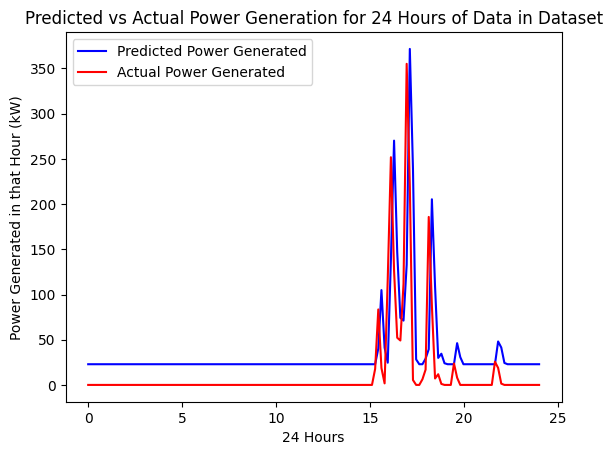

In [ ]:
pred24 = pred[0:144]
actual24 = y_test[0:144]

import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
x_axis = np.linspace(0, 24, num=144)

# Plotting both the curves simultaneously
plt.plot(x_axis, pred24, color='b', label='Predicted Power Generated')
plt.plot(x_axis, actual24, color='r', label='Actual Power Generated')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("24 Hours")
plt.ylabel("Power Generated in that Hour (kW)")
plt.title("Predicted vs Actual Power Generation for 24 Hours of Data in Dataset")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

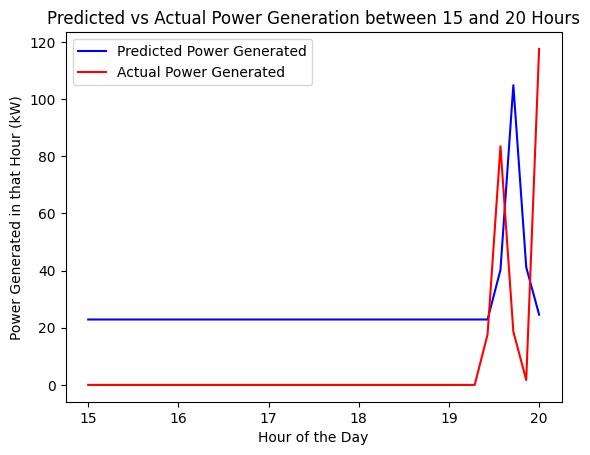

In [ ]:
pred24 = pred[60:96]
actual24 = y_test[60:96]

import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
x_axis = np.linspace(15, 20, num=36)

# Plotting both the curves simultaneously
plt.plot(x_axis, pred24, color='b', label='Predicted Power Generated')
plt.plot(x_axis, actual24, color='r', label='Actual Power Generated')

# Naming the x-axis, y-axis, and the whole graph
plt.xlabel("Hour of the Day")
plt.ylabel("Power Generated in that Hour (kW)")
plt.title("Predicted vs Actual Power Generation between 15 and 20 Hours")

# Adding legend, which helps us recognize the curve according to its color
plt.legend()

# To display the plot
plt.show()


#KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#model
knn = KNeighborsRegressor(n_neighbors=7)

# fit
knn.fit(x_train,y_train)

# predict
pred = knn.predict(x_test)


# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

R2: 0.9669
RMSE: 244.1
MAE: 143.2


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# model
dt = DecisionTreeRegressor(max_depth=10,random_state=27)

# fit
dt.fit(x_train, y_train)

# predict
pred = dt.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

R2: 0.9671
RMSE: 243.6
MAE: 138.4


#MLP Reggresor

In [ ]:
from sklearn.neural_network import MLPRegressor

#model
mlp = MLPRegressor(random_state=1, max_iter=30)

# fit
mlp.fit(x_train,y_train)

# predict
pred = mlp.predict(x_test)



# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.9712
RMSE: 227.8
MAE: 134.7


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#model
rf = RandomForestRegressor(n_estimators=20, random_state=1)

# fit
rf.fit(x_train,y_train)

# predict
pred = rf.predict(x_test)


# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

<ipython-input-32-7c4b72723ec1>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


R2: 0.9546
RMSE: 285.9
MAE: 166.3


#NN #1
- 3 dense layers
- 96 to 500 to 8 to 48
- 10 epochs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import Input

In [ ]:
# define the keras model
model1 = Sequential()
model1.add(Dense(500, input_dim=1, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1264/1264 [==============================] - 3s 2ms/step - loss: 98887.8438
Epoch 2/10
1264/1264 [==============================] - 2s 2ms/step - loss: 61573.2266
Epoch 3/10
1264/1264 [==============================] - 4s 3ms/step - loss: 61810.3164
Epoch 4/10
1264/1264 [==============================] - 4s 3ms/step - loss: 62027.0352
Epoch 5/10
1264/1264 [==============================] - 4s 3ms/step - loss: 61954.3359
Epoch 6/10
1264/1264 [==============================] - 3s 3ms/step - loss: 61903.4180
Epoch 7/10
1264/1264 [==============================] - 6s 5ms/step - loss: 61600.7070
Epoch 8/10
1264/1264 [==============================] - 4s 3ms/step - loss: 61617.1680
Epoch 9/10
1264/1264 [==============================] - 4s 3ms/step - loss: 61624.9297
Epoch 10/10
1264/1264 [==============================] - 5s 4ms/step - loss: 61545.3008


In [ ]:
#predict
pred = model1.predict(x_test)



# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 0s 1ms/step
R2: 0.9712
RMSE: 227.9
MAE: 129.4


In [ ]:
pred24 = pred[0:144]
actual24 = y_test[0:144]

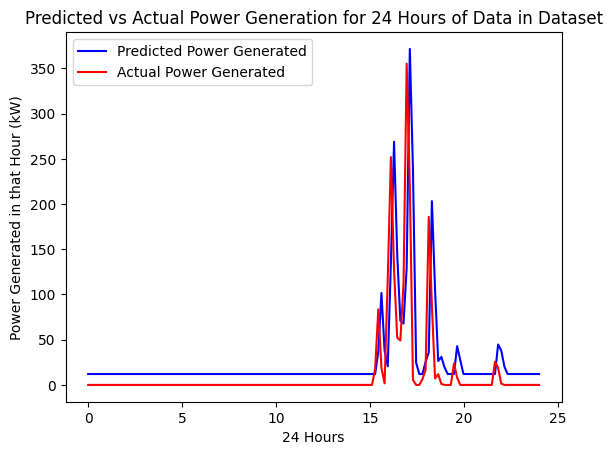

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
x_axis = np.linspace(0, 24, num=144)

# Plotting both the curves simultaneously
plt.plot(x_axis, pred24, color='b', label='Predicted Power Generated')
plt.plot(x_axis, actual24, color='r', label='Actual Power Generated')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("24 Hours")
plt.ylabel("Power Generated in that Hour (kW)")
plt.title("Predicted vs Actual Power Generation for 24 Hours of Data in Dataset")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:
pred24 = pred[90:120]
actual24 = y_test[90:120]

import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
x_axis = np.linspace(15, 20, num=30)

# Plotting both the curves simultaneously
plt.plot(x_axis, pred24, color='b', label='Predicted Power Generated')
plt.plot(x_axis, actual24, color='r', label='Actual Power Generated')

# Naming the x-axis, y-axis, and the whole graph
plt.xlabel("Hour of the Day")
plt.ylabel("Power Generated in that Hour (kW)")
plt.title("Predicted vs Actual Power Generation between 15 and 20 Hours")

# Adding legend, which helps us recognize the curve according to its color
plt.legend()

# To display the plot
plt.show()


NameError: ignored

#NN2
- 3 dense layers
- 96 to 1000 to 8 to 48
- 10 epochs

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(1000, input_dim=1, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1264/1264 [==============================] - 8s 5ms/step - loss: 101955.5156
Epoch 2/10
1264/1264 [==============================] - 5s 4ms/step - loss: 61850.8477
Epoch 3/10
1264/1264 [==============================] - 6s 5ms/step - loss: 61830.7148
Epoch 4/10
1264/1264 [==============================] - 8s 7ms/step - loss: 62029.2109
Epoch 5/10
1264/1264 [==============================] - 4s 3ms/step - loss: 61693.7656
Epoch 6/10
1264/1264 [==============================] - 5s 4ms/step - loss: 61731.6797
Epoch 7/10
1264/1264 [==============================] - 4s 3ms/step - loss: 61772.7109
Epoch 8/10
1264/1264 [==============================] - 5s 4ms/step - loss: 61946.2500
Epoch 9/10
1264/1264 [==============================] - 3s 3ms/step - loss: 61565.6797
Epoch 10/10
1264/1264 [==============================] - 6s 5ms/step - loss: 61705.5703


In [ ]:
#predict
pred = model2.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 3ms/step
R2: 0.971
RMSE: 228.6
MAE: 130.5


#NN3
- 3 dense layers
- 96 to 1000 to 8 to 48
- 15 epochs

In [ ]:
# define the keras model
model3 = Sequential()
model3.add(Dense(1000, input_dim=1, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1))
model3.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model3.fit(x_train, y_train, epochs=15)

Epoch 1/15
1264/1264 [==============================] - 6s 4ms/step - loss: 78417.6484
Epoch 2/15
1264/1264 [==============================] - 3s 3ms/step - loss: 62244.6758
Epoch 3/15
1264/1264 [==============================] - 4s 3ms/step - loss: 62367.0039
Epoch 4/15
1264/1264 [==============================] - 3s 2ms/step - loss: 62254.0898
Epoch 5/15
1264/1264 [==============================] - 3s 2ms/step - loss: 61909.0234
Epoch 6/15
1264/1264 [==============================] - 4s 3ms/step - loss: 62078.3750
Epoch 7/15
1264/1264 [==============================] - 5s 4ms/step - loss: 61978.7578
Epoch 8/15
1264/1264 [==============================] - 4s 3ms/step - loss: 61913.7852
Epoch 9/15
1264/1264 [==============================] - 3s 2ms/step - loss: 62077.7500
Epoch 10/15
1264/1264 [==============================] - 4s 3ms/step - loss: 61913.9141
Epoch 11/15
1264/1264 [==============================] - 4s 3ms/step - loss: 61884.3320
Epoch 12/15
1264/1264 [==================

In [ ]:
#predict
pred = model3.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 2ms/step
R2: 0.971
RMSE: 228.5
MAE: 130.1


#NN #4
- 2 dense layers
- 96 to 100 to 48
- 10 epochs

In [ ]:
model4 = Sequential()
model4.add(Dense(100, activation='relu', input_dim=1))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')
model4.fit(x_train, y_train, epochs=10)

Epoch 1/10
1264/1264 [==============================] - 3s 2ms/step - loss: 178379.5312
Epoch 2/10
1264/1264 [==============================] - 2s 2ms/step - loss: 61180.8203
Epoch 3/10
1264/1264 [==============================] - 2s 2ms/step - loss: 61303.7266
Epoch 4/10
1264/1264 [==============================] - 3s 2ms/step - loss: 61395.1680
Epoch 5/10
1264/1264 [==============================] - 4s 3ms/step - loss: 61611.6328
Epoch 6/10
1264/1264 [==============================] - 2s 2ms/step - loss: 61380.6602
Epoch 7/10
1264/1264 [==============================] - 2s 2ms/step - loss: 61491.6406
Epoch 8/10
1264/1264 [==============================] - 2s 2ms/step - loss: 61382.0469
Epoch 9/10
1264/1264 [==============================] - 2s 2ms/step - loss: 61359.9141
Epoch 10/10
1264/1264 [==============================] - 3s 3ms/step - loss: 61375.0430


In [ ]:
#predict
pred = model4.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 1ms/step
R2: 0.9711
RMSE: 228.1
MAE: 129.0


#NN #5
- 3 dense layers
- 96 to 1000 to 8 to 48
- 20 epochs

In [ ]:
# define the keras model
model5 = Sequential()
model5.add(Dense(1000, input_dim=1, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1))
model5.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model5.fit(x_train, y_train, epochs=20)

Epoch 1/20
1264/1264 [==============================] - 4s 2ms/step - loss: 77399.6641
Epoch 2/20
1264/1264 [==============================] - 3s 2ms/step - loss: 62923.9375
Epoch 3/20
1264/1264 [==============================] - 4s 3ms/step - loss: 62537.9883
Epoch 4/20
1264/1264 [==============================] - 4s 3ms/step - loss: 62413.6602
Epoch 5/20
1264/1264 [==============================] - 3s 2ms/step - loss: 62268.8984
Epoch 6/20
1264/1264 [==============================] - 3s 2ms/step - loss: 61981.2148
Epoch 7/20
1264/1264 [==============================] - 3s 3ms/step - loss: 62236.3789
Epoch 8/20
1264/1264 [==============================] - 4s 3ms/step - loss: 61874.0273
Epoch 9/20
1264/1264 [==============================] - 3s 2ms/step - loss: 61909.0742
Epoch 10/20
1264/1264 [==============================] - 3s 2ms/step - loss: 62164.6250
Epoch 11/20
1264/1264 [==============================] - 3s 2ms/step - loss: 61856.7305
Epoch 12/20
1264/1264 [==================

In [ ]:
#predict
pred = model5.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 2ms/step
R2: 0.9713
RMSE: 227.5
MAE: 131.6


#NN #6
- 3 dense layers
- 96 to 100 to 100 to 48
- 30 epochs

In [ ]:
model6 = Sequential()
model6.add(Input(shape=(1,)))
model6.add(Dense(100, activation = 'relu'))
model6.add(Dense(100, activation = 'relu'))
model6.add(Dense(1, activation = 'relu'))
model6.compile(loss='mse', optimizer='adam')
model6.fit(x_train, y_train, epochs=30)

Epoch 1/30
1264/1264 [==============================] - 4s 3ms/step - loss: 80922.8516
Epoch 2/30
1264/1264 [==============================] - 3s 2ms/step - loss: 62125.4062
Epoch 3/30
1264/1264 [==============================] - 2s 2ms/step - loss: 62314.9023
Epoch 4/30
1264/1264 [==============================] - 2s 2ms/step - loss: 61928.6836
Epoch 5/30
1264/1264 [==============================] - 2s 2ms/step - loss: 61748.4570
Epoch 6/30
1264/1264 [==============================] - 3s 2ms/step - loss: 61789.8125
Epoch 7/30
1264/1264 [==============================] - 4s 3ms/step - loss: 62227.0742
Epoch 8/30
1264/1264 [==============================] - 2s 2ms/step - loss: 62217.2266
Epoch 9/30
1264/1264 [==============================] - 2s 2ms/step - loss: 61810.8555
Epoch 10/30
1264/1264 [==============================] - 3s 2ms/step - loss: 61686.2930
Epoch 11/30
1264/1264 [==============================] - 4s 3ms/step - loss: 61757.4883
Epoch 12/30
1264/1264 [==================

In [ ]:
#predict
pred = model6.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 0s 1ms/step
R2: 0.9698
RMSE: 233.2
MAE: 146.5


In [ ]:
pred = pred.flatten()

# Create the DataFrame 'test_df_2'
nwb_nn6 = pd.DataFrame({'pred': pred, 'y_test': y_test['LV ActivePower (kW)']})

# Print the DataFrame
nwb_nn6.head()

,pred,y_test
40423,10.521995,0.0
40424,10.521995,0.0
40425,10.521995,0.0
40426,10.521995,0.0
40427,10.521995,0.0


In [ ]:
from google.colab import files
nwb_nn6.to_csv('nwb_nn6.csv')
files.download('nwb_nn6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#NN #7
- 3 dense layers
- 96 to 1000 to 8 to 48
- 30 epochs

In [ ]:
# define the keras model
model7 = Sequential()
model7.add(Dense(1000, input_dim=1, activation='relu'))
model7.add(Dense(8, activation='relu'))
model7.add(Dense(1))
model7.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model7.fit(x_train, y_train, epochs=30)

Epoch 1/30
1264/1264 [==============================] - 5s 3ms/step - loss: 78726.0000
Epoch 2/30
1264/1264 [==============================] - 3s 3ms/step - loss: 62679.6914
Epoch 3/30
1264/1264 [==============================] - 3s 2ms/step - loss: 62146.8242
Epoch 4/30
1264/1264 [==============================] - 3s 2ms/step - loss: 62434.2734
Epoch 5/30
1264/1264 [==============================] - 3s 3ms/step - loss: 62160.1797
Epoch 6/30
1264/1264 [==============================] - 4s 3ms/step - loss: 62188.1328
Epoch 7/30
1264/1264 [==============================] - 4s 3ms/step - loss: 62076.6641
Epoch 8/30
1264/1264 [==============================] - 4s 3ms/step - loss: 61968.6562
Epoch 9/30
1264/1264 [==============================] - 4s 3ms/step - loss: 61897.8711
Epoch 10/30
1264/1264 [==============================] - 3s 3ms/step - loss: 61836.9531
Epoch 11/30
1264/1264 [==============================] - 3s 2ms/step - loss: 61806.6875
Epoch 12/30
1264/1264 [==================

In [ ]:
#predict
pred = model7.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 2ms/step
R2: 0.9712
RMSE: 227.6
MAE: 130.3
